In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

### DETECTING ENCODING : 


In [2]:
file = open("../data/Sample - Superstore.csv", "rb")
result = chardet.detect(file.read(11000))
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


### IMPORTING AND INITIAL OVERVIEW OF DATASET :

In [3]:
sales_data = pd.read_csv("../data/Sample - Superstore.csv", encoding = 'ISO-8859-1')
sales_data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
print("Rows :", sales_data.shape[0])
print("Columns :", sales_data.shape[1])

Rows : 9994
Columns : 21


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
print(sales_data.nunique().sort_values(ascending = False))

Row ID           9994
Profit           7287
Sales            5825
Order ID         5009
Product ID       1862
Product Name     1850
Ship Date        1334
Order Date       1237
Customer ID       793
Customer Name     793
Postal Code       631
City              531
State              49
Sub-Category       17
Quantity           14
Discount           12
Region              4
Ship Mode           4
Category            3
Segment             3
Country             1
dtype: int64


In [7]:
to_plot = []
for i in sales_data.columns:
    if sales_data[i].nunique() < 20 :
        to_plot.append(i)

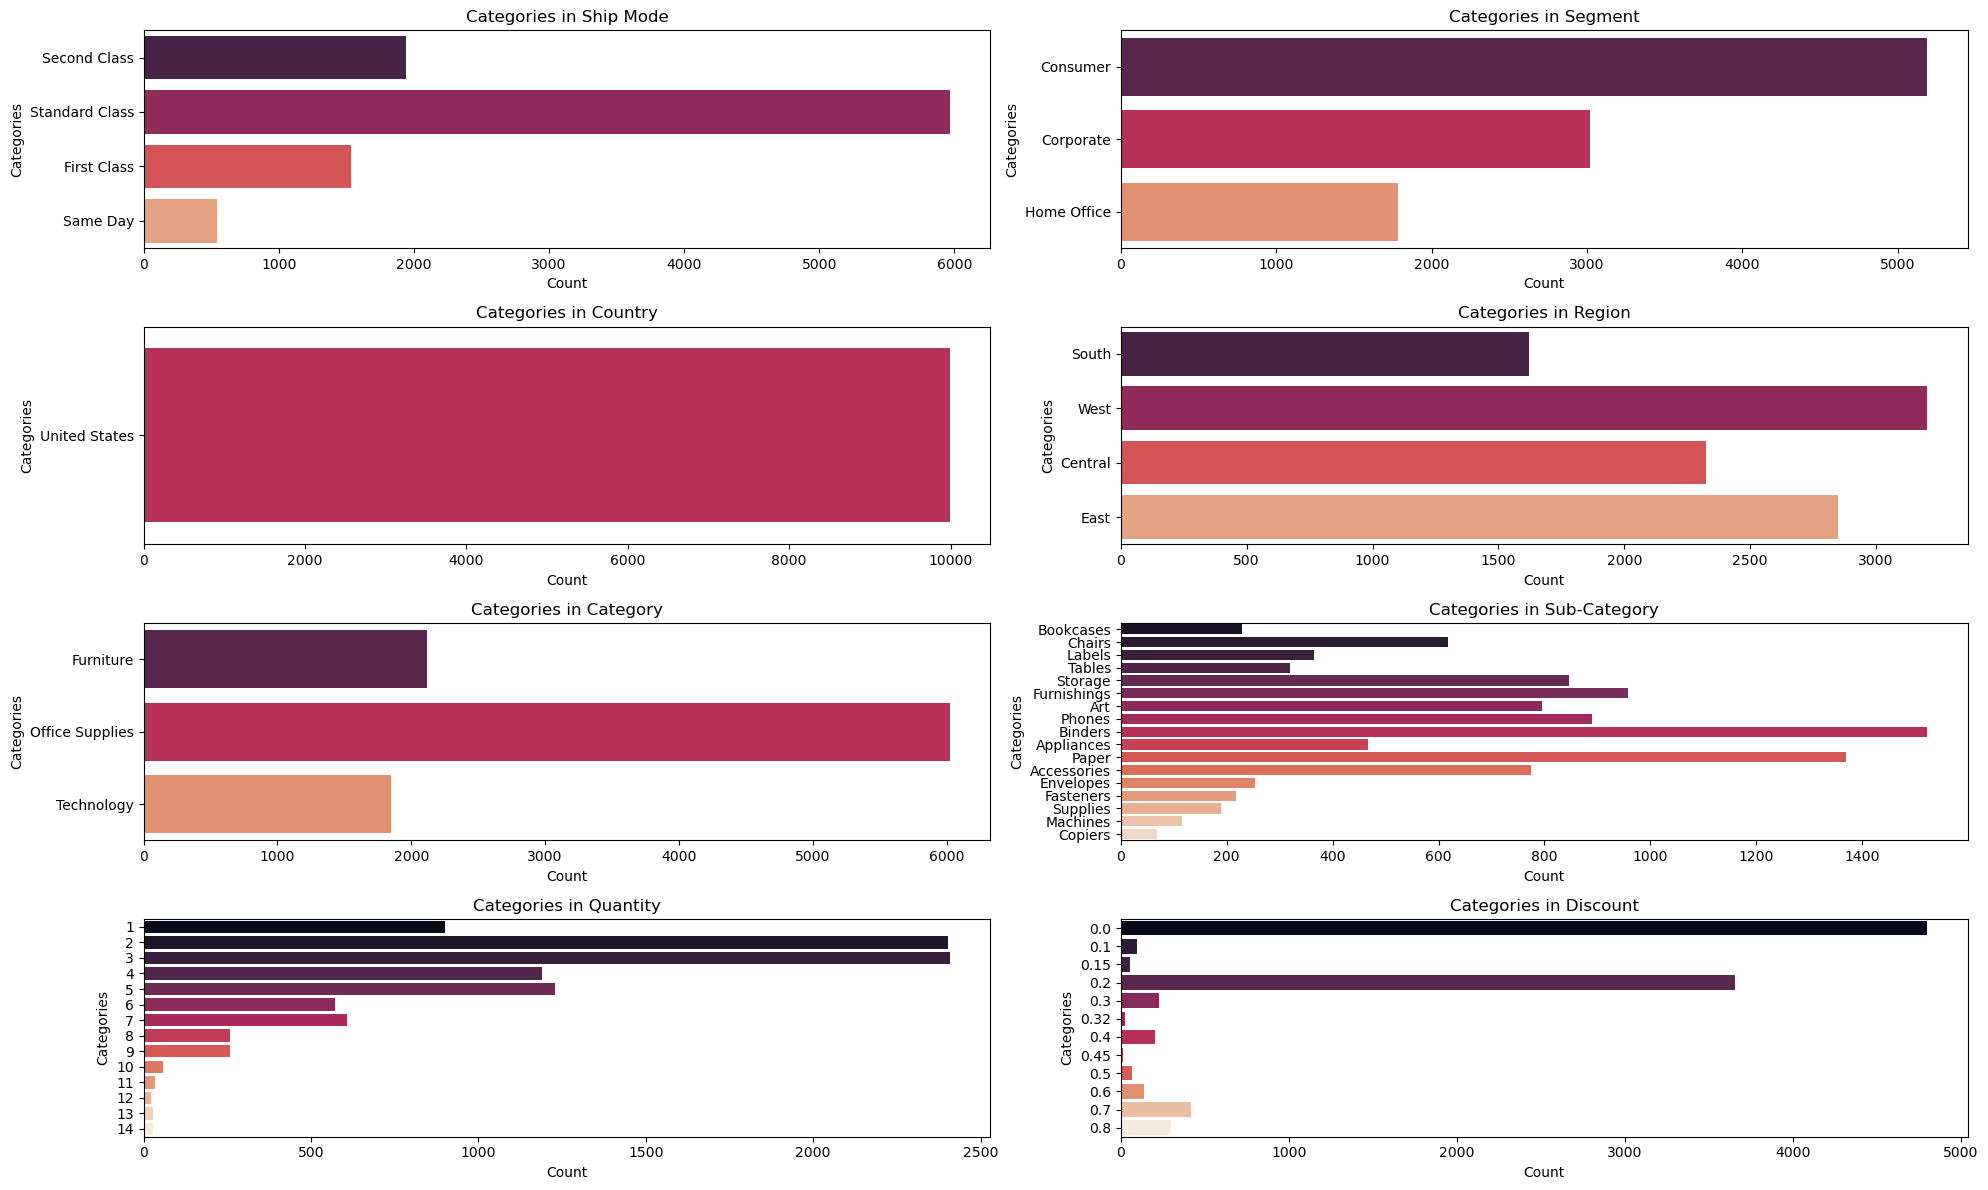

In [8]:
plt.figure(figsize = (20, 12))
for i, col in enumerate(to_plot, 1):
    plt.subplot(4, 2, i)
    sns.countplot(y = col, data = sales_data, hue = col, palette = "rocket", legend = False)
    plt.title(f"Categories in {col}")
    plt.xlabel("Count")
    plt.ylabel("Categories")

plt.tight_layout()
plt.show()



#### Insights from the Initial Overview

- No columns contain any `NULL` values.
- Column names should be standardized for ease of use.
- `Ship Date` and `Order Date` appear to be datetime columns but are currently typed as `object`.
- `Postal Code` is classified as `int64`, but it makes more sense as a categorical (`object`) type.
- Columns such as `Row ID`, `Customer ID`, and `Product ID` are likely unnecessary for the current analysis.
- The `Country` column contains a single unique value, making it redundant.

---------------------------------------------------------------------------------------------------------------------------------------


### DROPPING/STANDARDISING COLUMNS AND CHECKING FOR DUPLICATES :

In [9]:
sales_data.drop(["Country", "Row ID", "Customer ID", "Product ID"], inplace = True, axis = 1)

sales_data.columns = (
    sales_data.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

sales_data["ship_date"] = pd.to_datetime(sales_data["ship_date"])
sales_data["order_date"] = pd.to_datetime(sales_data["order_date"])

sales_data["profit_margin"] = (sales_data["profit"] / sales_data["sales"]) * 100
display(sales_data.head(5))

,order_id,order_date,ship_date,ship_mode,customer_name,segment,city,state,postal_code,region,category,sub-category,product_name,sales,quantity,discount,profit,profit_margin
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25


In [14]:
sales_data["order_month"] = sales_data["order_date"].dt.to_period('M').dt.to_timestamp()
sales_data["order_dow"] = sales_data["order_date"].dt.day_name()
sales_data["order_quarter"] = sales_data["order_date"].dt.to_period('Q').dt.to_timestamp()

## EDA
### 1. OVERALL PERFORMANCE : 

In [16]:
print("Key Metrics \n" + "-"*50 + "\n")
print(f"Total Sales :{sales_data["sales"].sum()}")
print(f"Total Profit :{sales_data["profit"].sum()}")
print(f"Average Profit Margin :{sales_data["profit_margin"].mean()}")
print("\n" + "-"*50)

Key Metrics 
--------------------------------------------------

Total Sales :2297200.8603000003
Total Profit :286397.0217
Average Profit Margin :12.031392972104458

--------------------------------------------------


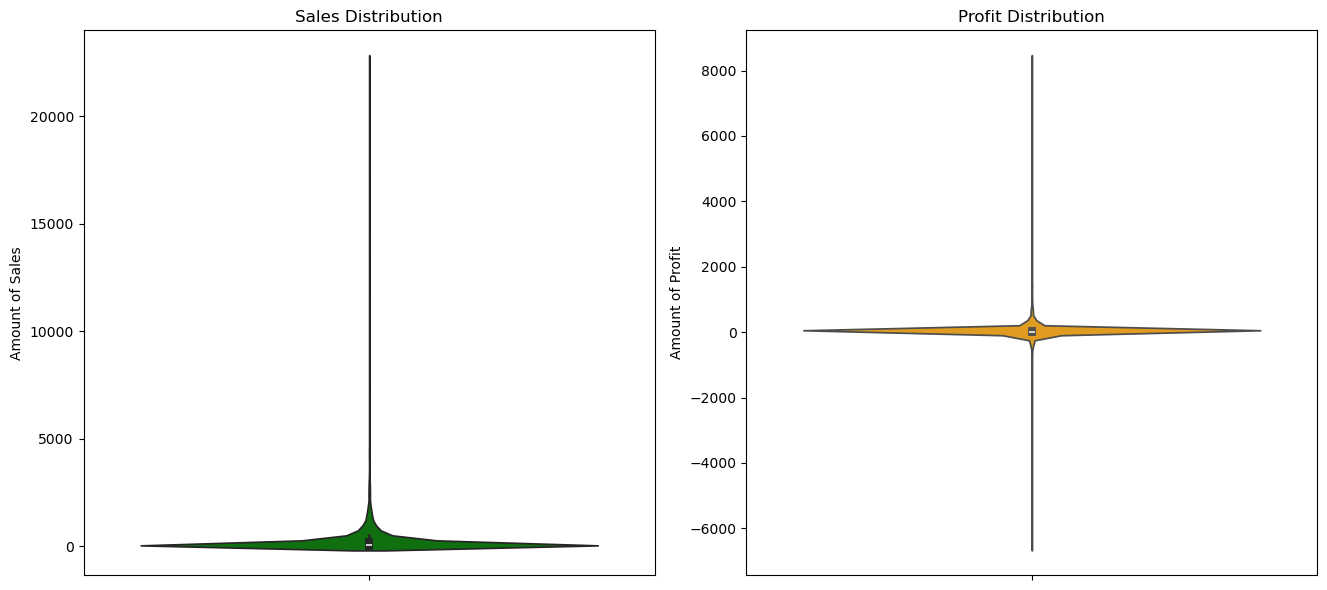

In [17]:
plt.figure(figsize = (20, 6))

plt.subplot(1,3,1)
sns.violinplot(sales_data["sales"], color = "green")
plt.title("Sales Distribution")
plt.ylabel("Amount of Sales")

plt.subplot(1,3,2)
sns.violinplot(sales_data["profit"], color = "orange")
plt.title("Profit Distribution")
plt.ylabel("Amount of Profit")

plt.tight_layout()
plt.show()


---

####  SALES DISTRIBUTION
- The sales distribution is **heavily right-skewed**, with most orders contributing **low sales amounts**.
- A **long tail** extends beyond \$20,000, suggesting a few **high-value orders** significantly inflate the total revenue.
- This indicates that the business likely relies on **a small number of big-ticket transactions or bulk orders**

####  PROFIT DISTRIBUTION
- The profit distribution is **centered around zero**, with both **positive and negative values**.
- There are instances of **substantial losses** (as low as -\$6000), showing that some transactions are **unprofitable**.
- The long right tail is shorter than in sales, meaning **fewer transactions lead to high profits**.

---

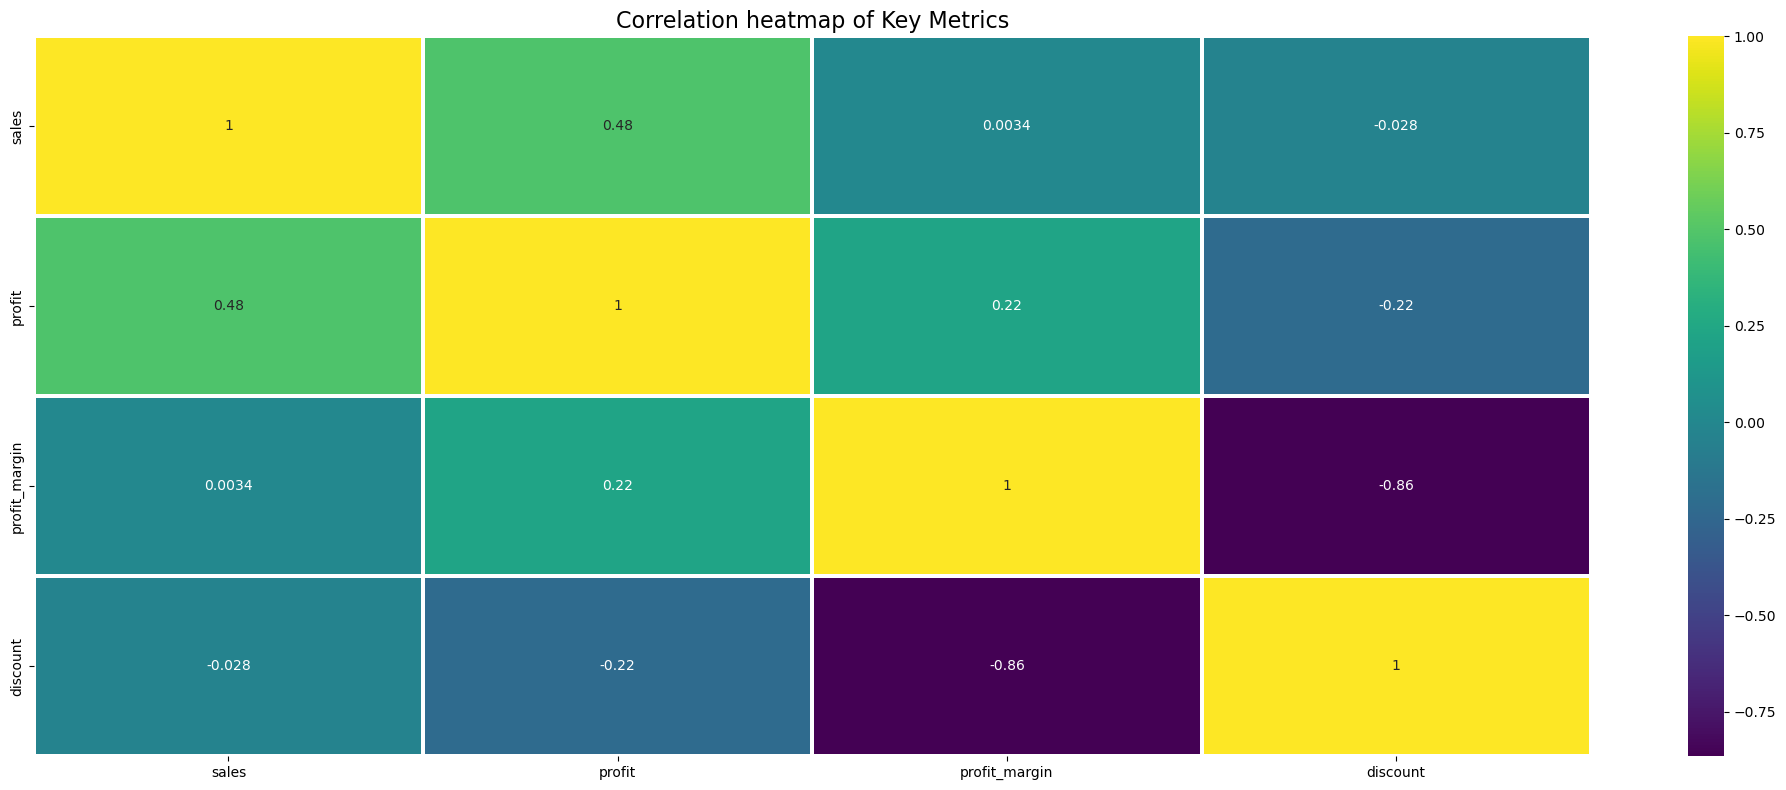

In [18]:
corr_matrix = sales_data[["sales", "profit", "profit_margin", "discount"]].corr()

plt.figure(figsize =(20, 8))
sns.heatmap(
    corr_matrix,
    annot = True,
    cmap = "viridis", 
    linewidth = 1.5
)

plt.title("Correlation heatmap of Key Metrics", fontsize = 16)
plt.tight_layout()
plt.show()

---

- **Sales and Profit** show a **moderate positive correlation** (`0.48`):  
  As sales increase, profit tends to increase, but not perfectly—indicating other factors (like discounting or cost structure) also influence profit.

- **Profit and Profit Margin** have a **weak positive correlation** (`0.22`):  
  This implies that increasing profit doesn't always translate to high profit margins, possibly due to variations in sales volumes or discounting strategies.

- **Profit Margin and Discount** show a **very strong negative correlation** (`-0.86`):  
  A key business insight—**higher discounts severely reduce profit margins**, which is intuitive since discounts directly eat into the margins.

- **Sales and Profit Margin** have **negligible correlation** (`0.0034`):  
  Indicates that **high sales do not necessarily imply high margins**—suggesting many high-sale orders might come from low-margin deals.

- **Discount and Sales/Profit**:
  - **Sales vs Discount**: Negligible correlation (`-0.028`)
  - **Profit vs Discount**: Weak negative correlation (`-0.22`)  

These suggest that while discounts may not significantly drive up sales, they can erode profits slightly.

---

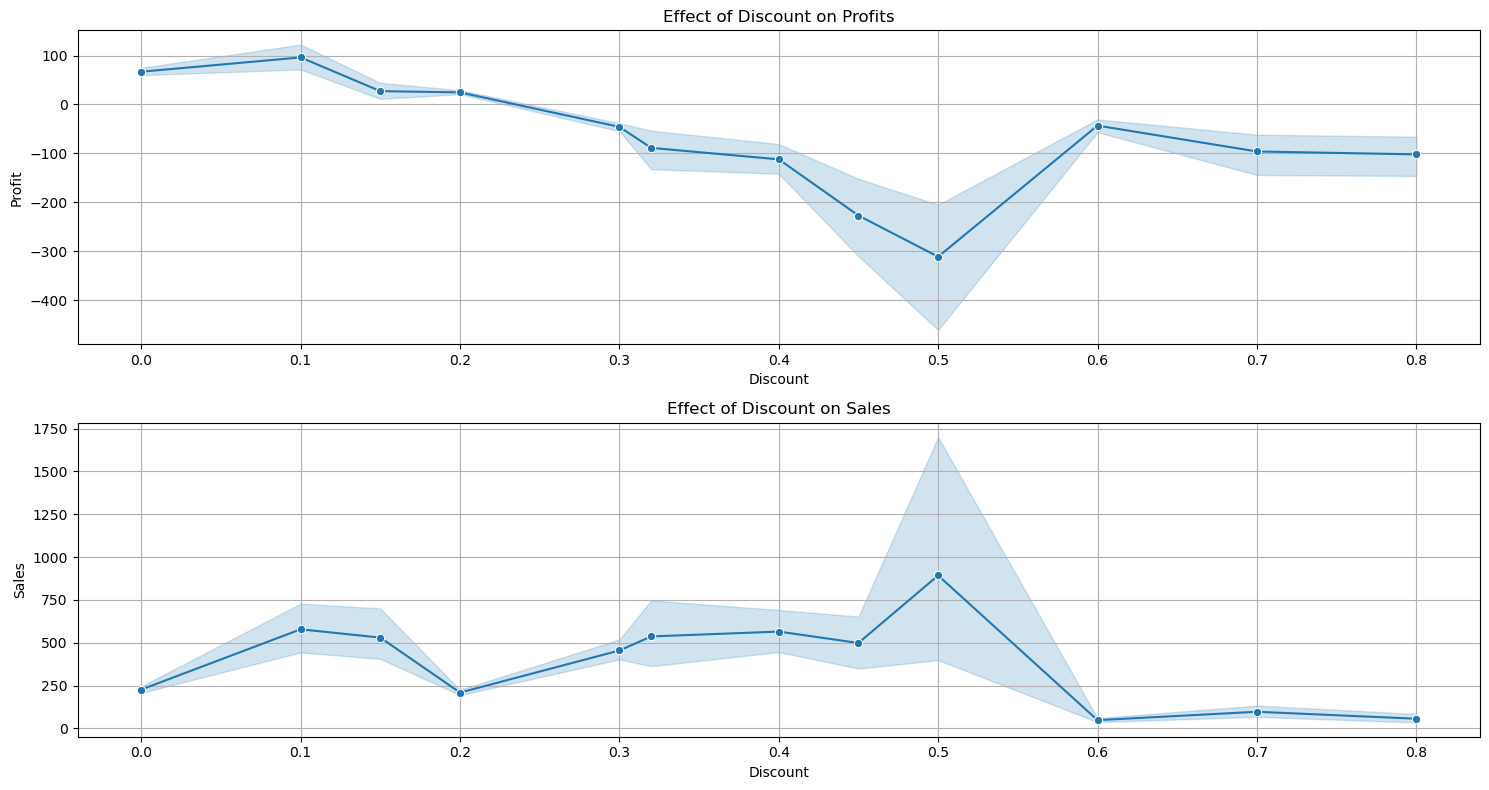

In [19]:
plt.figure(figsize = (15, 8))

plt.subplot(2,1,1)
sns.lineplot(
    y = "profit",
    x = "discount",
    data = sales_data,
    marker = "o"
)
plt.grid(True)
plt.title("Effect of Discount on Profits")
plt.xlabel("Discount")
plt.ylabel("Profit")

plt.subplot(2,1,2)
sns.lineplot(
    y = "sales",
    x = "discount",
    data = sales_data,
    marker = "o"
)
plt.grid(True)
plt.title("Effect of Discount on Sales")
plt.xlabel("Discount")
plt.ylabel("Sales")

plt.tight_layout()
plt.show()

---

#### EFFECT OF DISCOUNTS ON PROFIT :
- Profits are **highest at 0% and 10% discount**, with the peak around **10%**.
- After 10%, profits **decline steadily**—becoming **negative beyond 30%**, and reaching a **low around 50%**.
- Slight recovery at 60%, but still not near initial levels.
- Insight: **Higher discounts significantly erode profits**. Anything above 20–30% tends to make orders unprofitable.

#### EFFECT OF DISCOUNT ON SALES :
- Sales **increase** up to a discount of **10–30%**, peaking at around **50%**—but with **high variability** (large confidence interval).
- Post 50%, sales **drop sharply**, especially from 60% onward.
- Insight: Discounts can temporarily boost sales, but **the highest discounts don't guarantee consistent or reliable increases**—and they **devastate profits**.

---



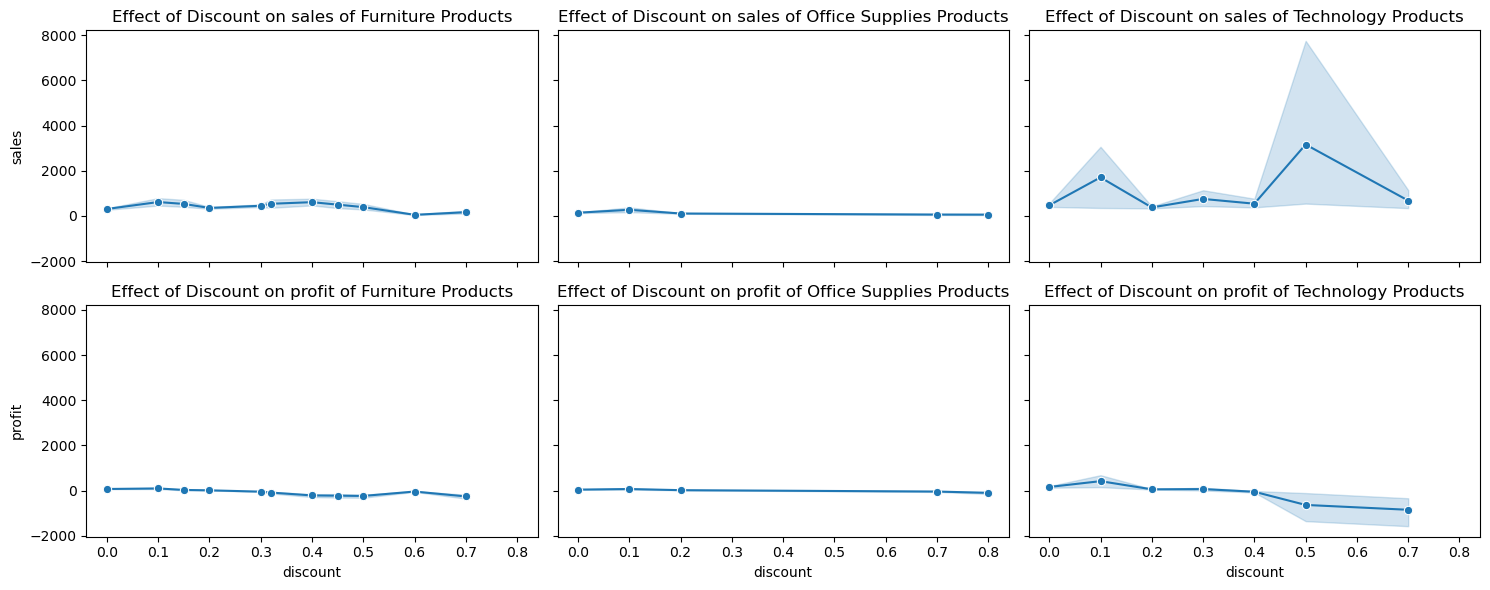

In [20]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex = True, sharey = True, figsize = (15, 6))

categories = sales_data["category"].unique()
metrics = ["sales", "profit"]

for row in range(2):
    for col in range(3):
        cat = categories[col]
        metric = metrics[row]
        sns.lineplot(
            x = "discount",
            y = metric,
            data = sales_data[sales_data["category"] == cat],
            marker = "o",
            ax = axes[row, col]
        )
        axes[row, col].set_title(f"Effect of Discount on {metric} of {cat} Products")
plt.tight_layout()
plt.show()

--- 

1. #### FURNITURE

    - **Sales**: Slight increase with low discounts (~0–10%), then flat or declining.

    - **Profit**: Steady decline with higher discounts; turns negative beyond 30%.

2. #### OFFICE SUPPLIES

    - **Sales**: Minimal change regardless of discount.

    - **Profit**: Decreases steadily with increasing discounts.

3. #### TECHNOLOGY

    - **Sales**: Fluctuates with discount levels; peak at 50%, but unstable.

    - **Profit**: Sharp drop beyond 40% discount.
  
---

### 2. SALES AND PROFIT BY CATEGORY/SUB-CATEGORY : 

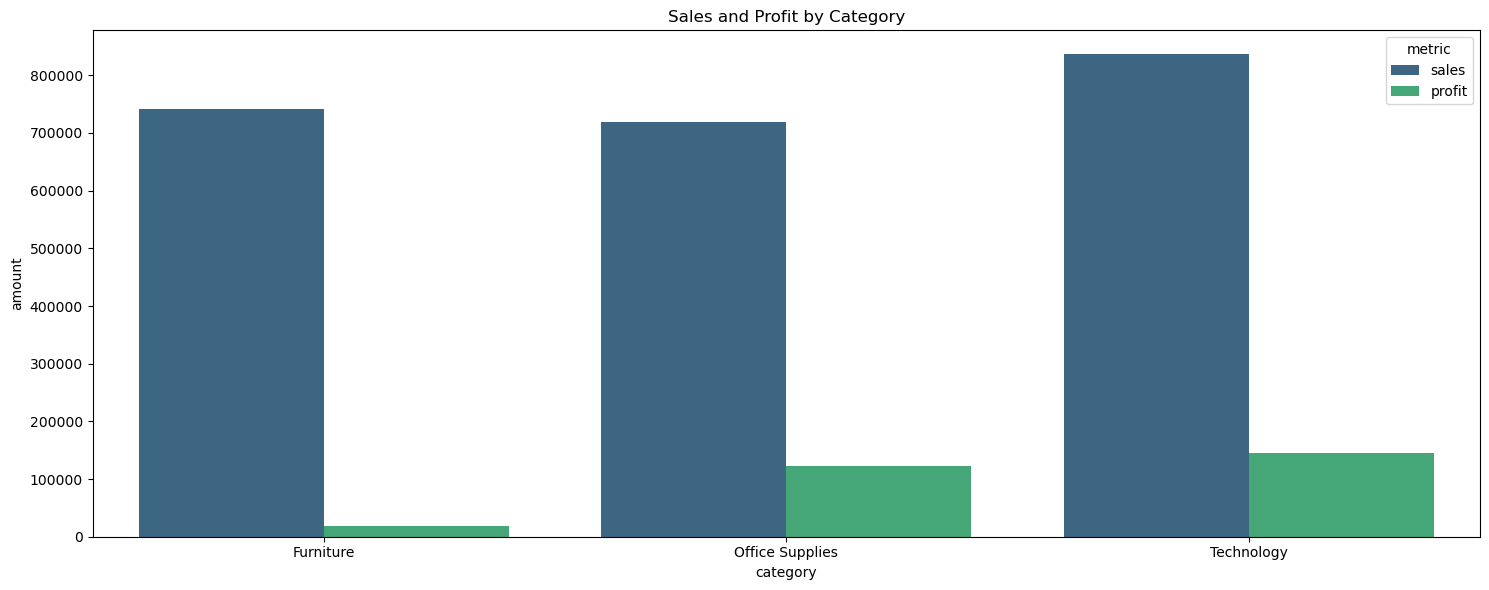

In [21]:
category_perf = (
    sales_data.groupby("category")[["sales", "profit"]]
    .sum()
    .reset_index()
    .melt(id_vars = "category", value_vars = ["sales", "profit"], var_name = "metric", value_name = "amount")
)

#display(category_perf)

plt.figure(figsize = (15, 6))
sns.barplot(
    data = category_perf, 
    x = "category", 
    y = "amount", 
    hue = "metric",
    palette = "viridis"
)

plt.title("Sales and Profit by Category")
plt.tight_layout()
plt.show()

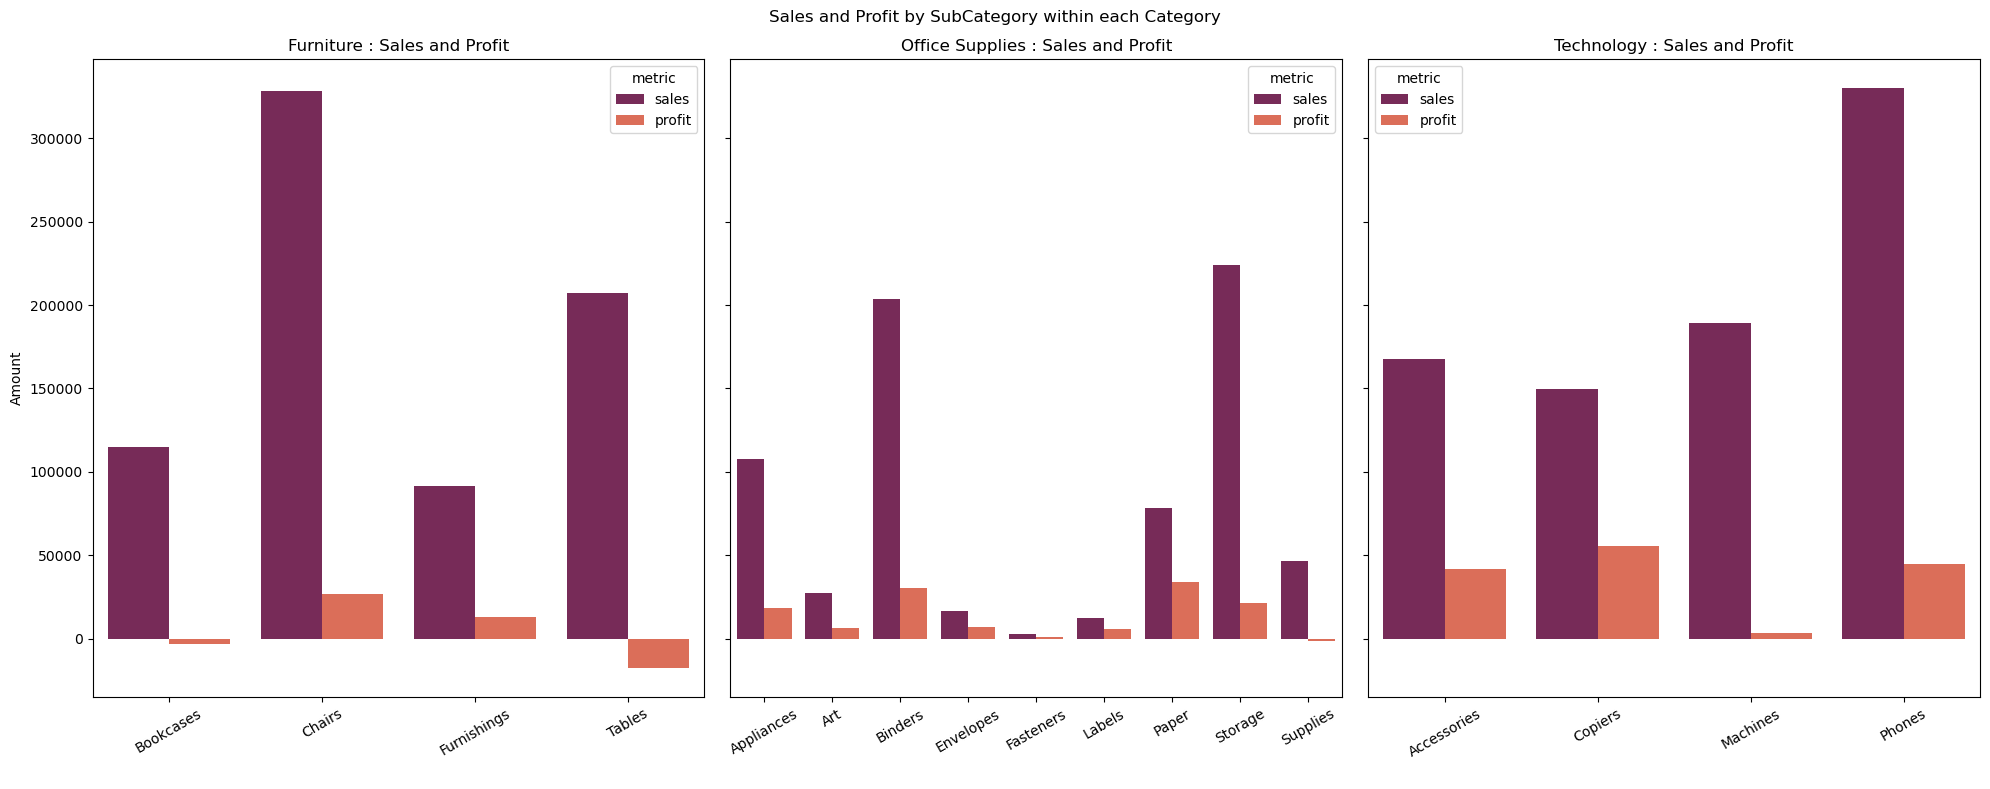

In [22]:
categories = sales_data["category"].unique()
fig, axes = plt.subplots(nrows = 1, ncols = len(categories), sharey = True, figsize = (20, 8))

for i, cat in enumerate(categories):
    filter = sales_data["category"] == cat
    sub_df = sales_data[filter]
    grouped = (
        sub_df.groupby("sub-category")[["sales", "profit"]]
        .sum()
        .reset_index()
        .melt(id_vars = ["sub-category"], value_vars = ["sales", "profit"], value_name = "amount", var_name = "metric")
    )

    sns.barplot(
        x = "sub-category",
        y = "amount", 
        data = grouped,
        hue = "metric",
        palette = "rocket",
        ax = axes[i]
    )
    axes[i].set_title(f"{cat} : Sales and Profit")
    axes[i].set_ylabel("Amount")
    axes[i].set_xlabel(" ")
    axes[i].tick_params(axis = 'x', rotation = 30)

fig.suptitle("Sales and Profit by SubCategory within each Category")
plt.tight_layout()
plt.show()

---

+ `Technology` seems to be the most profitable category out of all 3
+ `Furniture` seems to be the least profitable category. 2 out of 4 sub - categories have a negative profit.
+ `Office Supplies` shows moderate sales and profit
+ `Accessories`, `Copiers`in Technology have high profit margin ie, Lower sales but higher profits. Conversely products like `Chairs`, `Storage`, `Phones` have huge sales but lack in profit and hence have a lower profit margin. 
+ `Bookcases` and `Tables` in Furniture have negative profits, indicating they are cost centers rather than profit generators.

---

### 3. REGIONAL ANALYSIS :

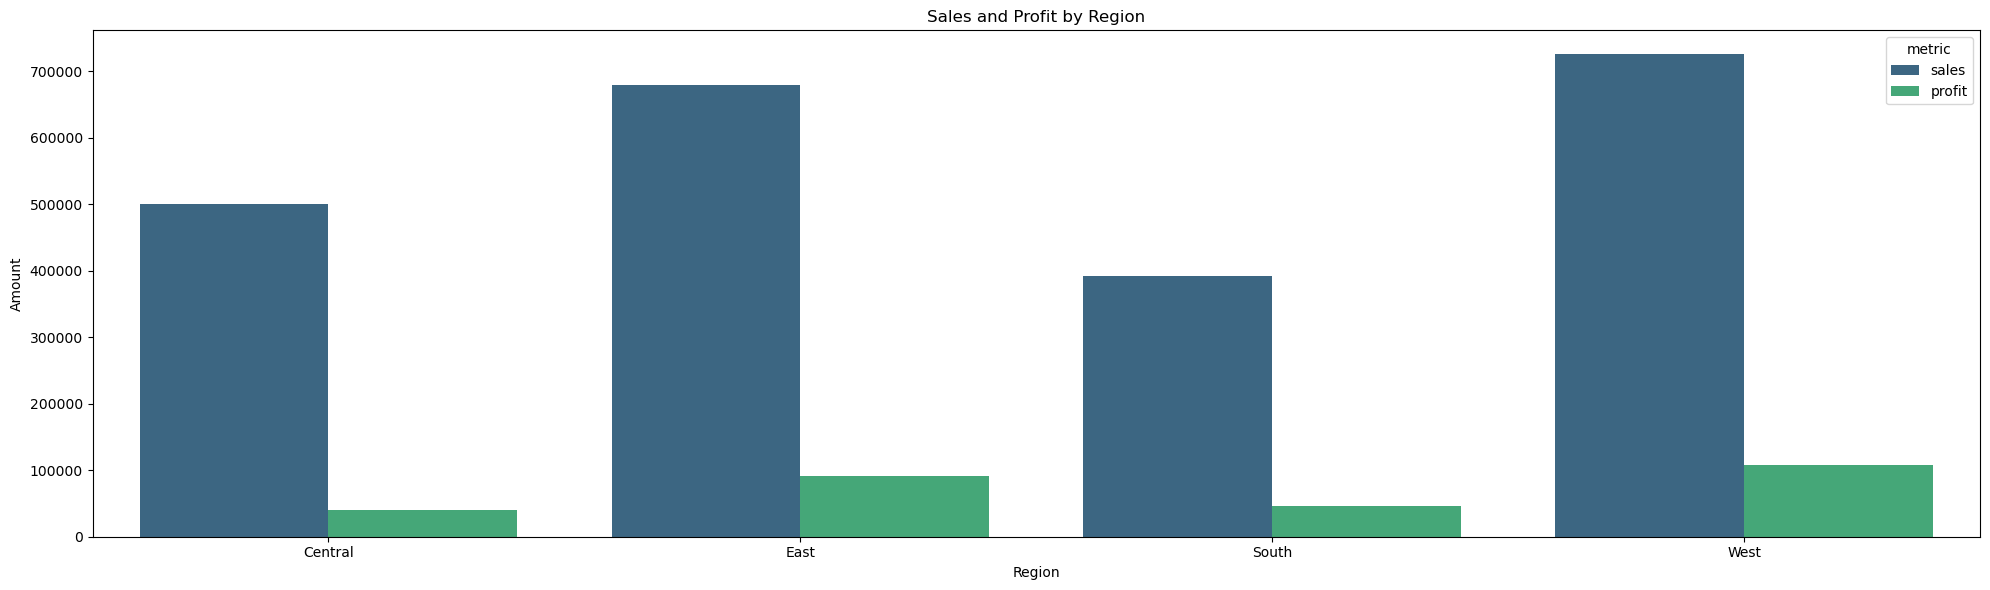

In [23]:
region_perf = (
    sales_data.groupby("region")[["sales", "profit"]]
    .sum()
    .reset_index()
    .melt(id_vars= "region", value_vars = ["sales", "profit"], value_name = "amount", var_name = "metric")
)

plt.figure(figsize = (20, 6))
sns.barplot(
    x = "region",
    y = "amount",
    hue = "metric",
    data = region_perf,
    palette = "viridis"
)

plt.xlabel("Region")
plt.ylabel("Amount")
plt.title("Sales and Profit by Region")
plt.tight_layout()
plt.show()

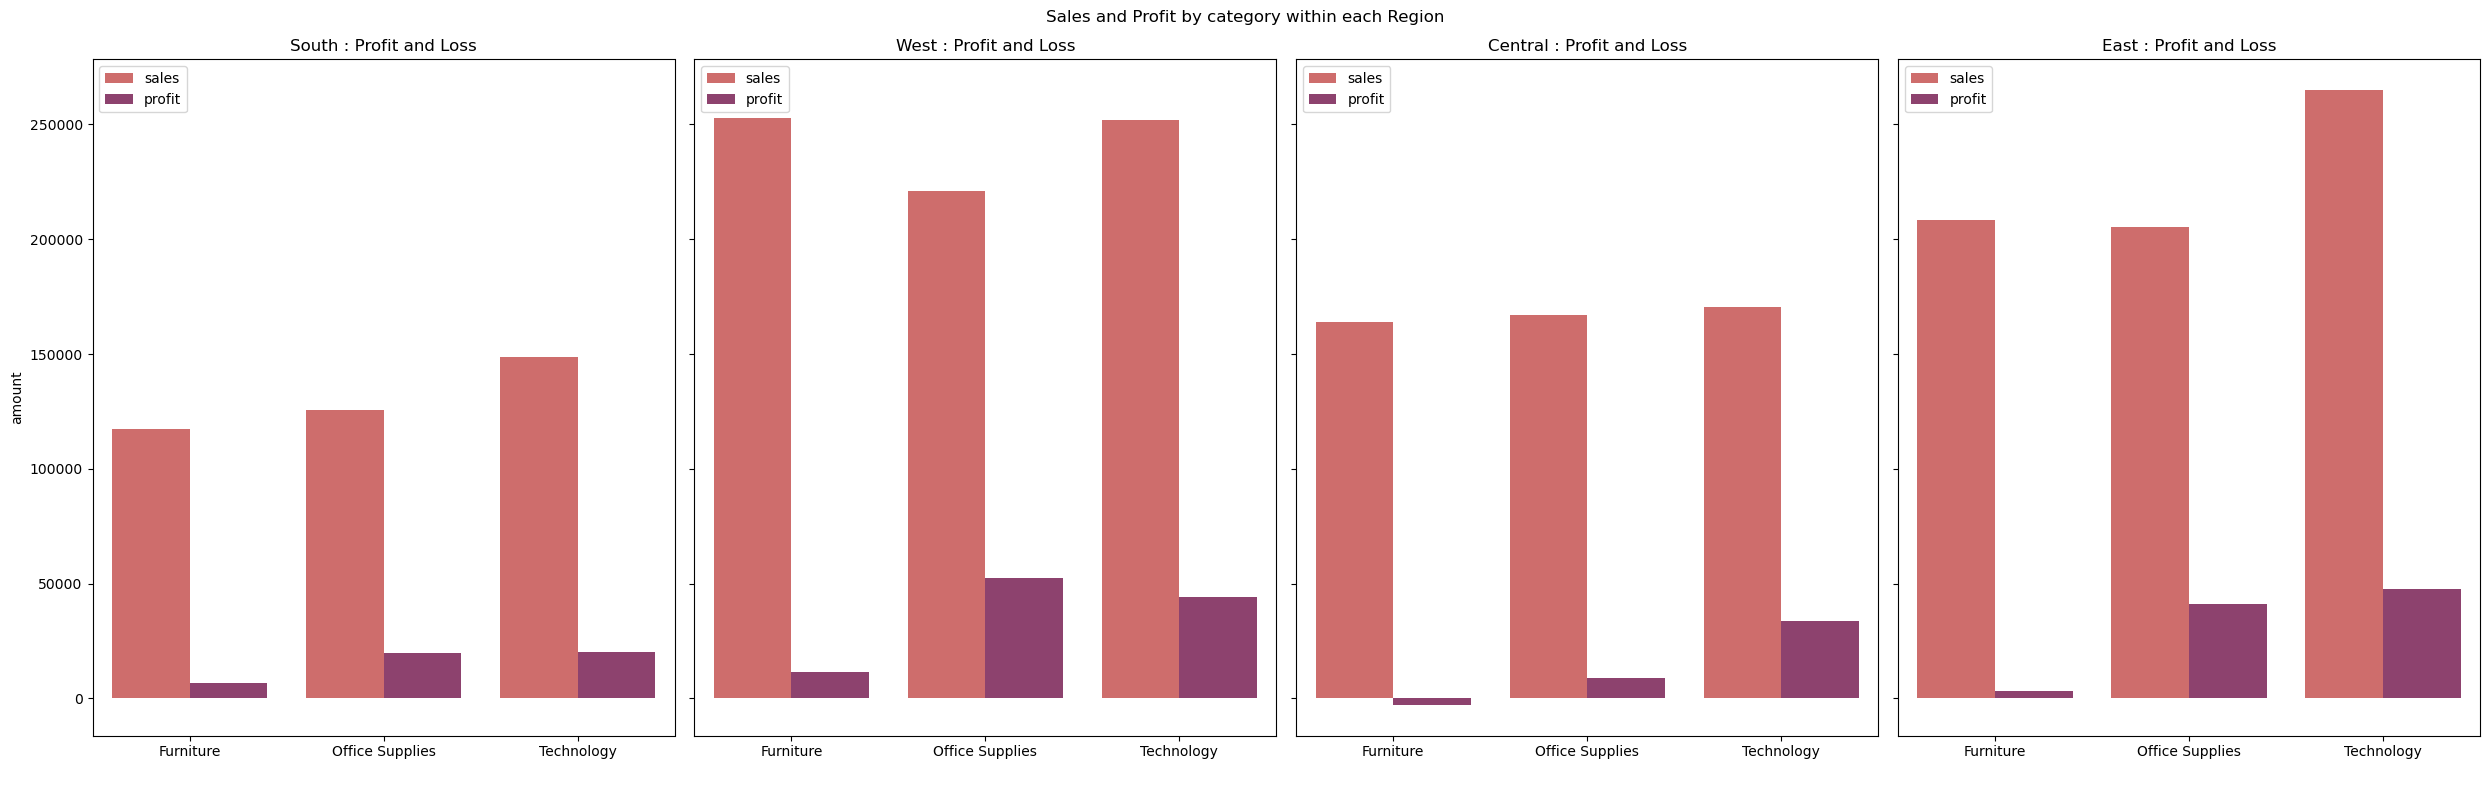

In [24]:
region_perf = (
    sales_data.groupby(["region", "category"])[["sales", "profit"]]
    .sum()
    .reset_index()
    .melt(id_vars = ["region", "category"], value_vars = ["sales", "profit"], value_name = "amount", var_name = "metric")
)
regions = sales_data["region"].unique()
fig, axes = plt.subplots(nrows = 1, ncols = len(regions), sharey = True, figsize = (25, 8))

for i, region in enumerate(regions):
    filter = region_perf["region"] == region
    sub_df = region_perf[filter]

    sns.barplot(
        x = "category",
        y = "amount",
        data = sub_df,
        hue = "metric",
        palette = "flare",
        ax = axes[i]
    )
    axes[i].set_title(f"{region} : Profit and Loss")
    axes[i].set_xlabel(" ")
    axes[i].legend(loc = "upper left")

fig.suptitle("Sales and Profit by category within each Region")
plt.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()
    
#display(region_perf.head(5))

---

+ `EAST` and `WEST` are dominating sales and profits across categories.
+ While sales in Technology and Office Supplies are fairly comparable, `WEST` has a clear advantage when it comes to Furniture. 
+ Technology dominates in profits in ALL Regions except the `WEST` where it loses out to Office supplies, despit having more Sales.
+ `CENTRE` returns a negative profit in Furniture.

---

4. #### Customer Segment Analysis

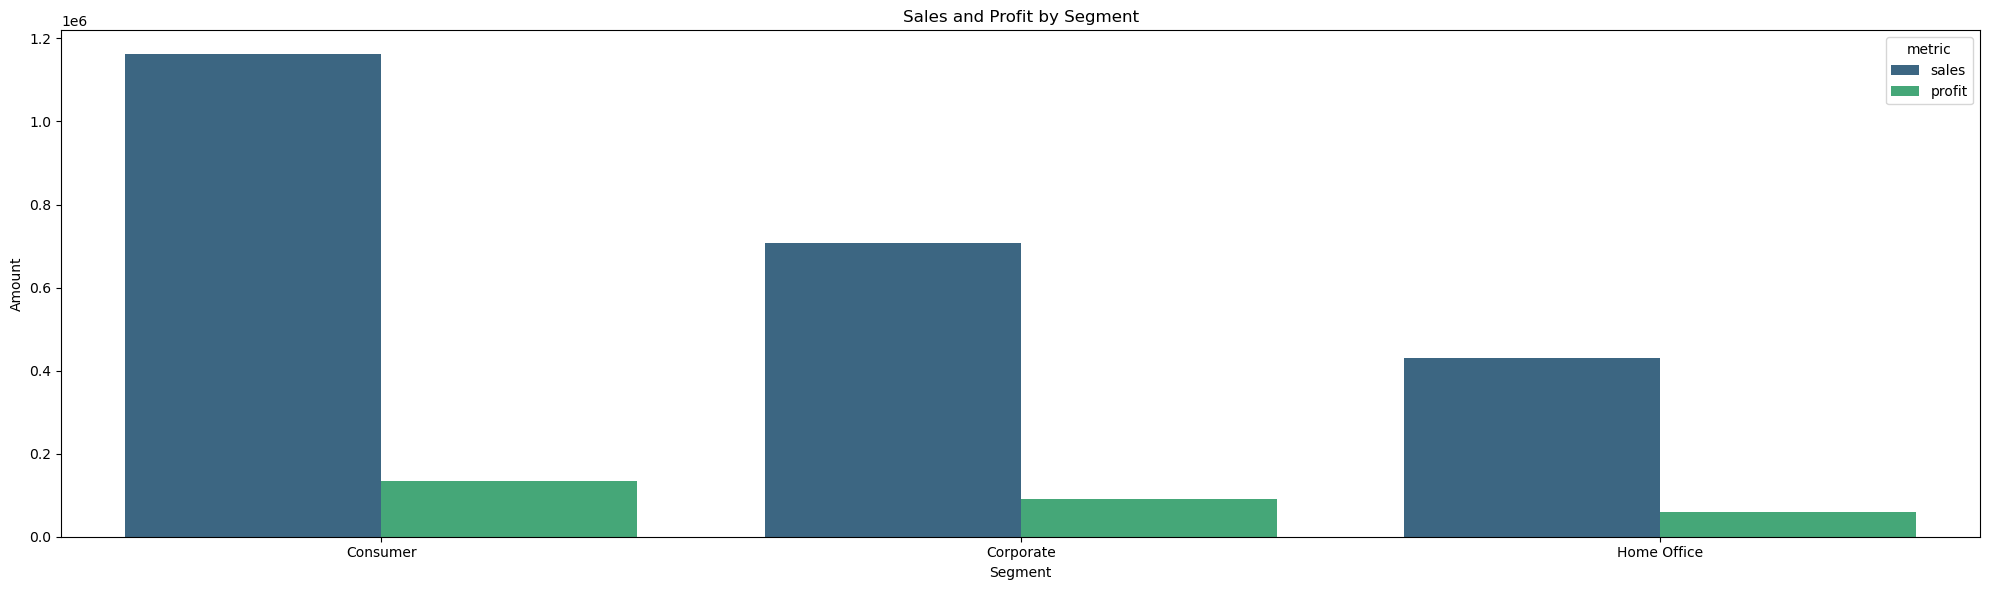

In [25]:
segment_perf = (
    sales_data.groupby("segment")[["sales", "profit"]]
    .sum()
    .reset_index()
    .melt(id_vars = "segment", value_vars = ["sales", "profit"], value_name = "amount", var_name = "metric")
)

plt.figure(figsize = (20, 6))
sns.barplot(
    x = "segment", 
    y = "amount",
    data = segment_perf,
    hue = "metric",
    palette = "viridis"
)
plt.xlabel("Segment")
plt.ylabel("Amount")
plt.title("Sales and Profit by Segment")
plt.tight_layout()
plt.show()
#display(segment_perf.head(5))

---

- **Consumer segment** has the highest total sales, followed by **Corporate** and **Home Office**.
- Profit follows the same order but is significantly lower than sales, especially in the **Consumer** segment.
- Despite lower sales, the **Home Office** segment appears to have a better **profit-to-sales ratio**, suggesting higher efficiency.

---

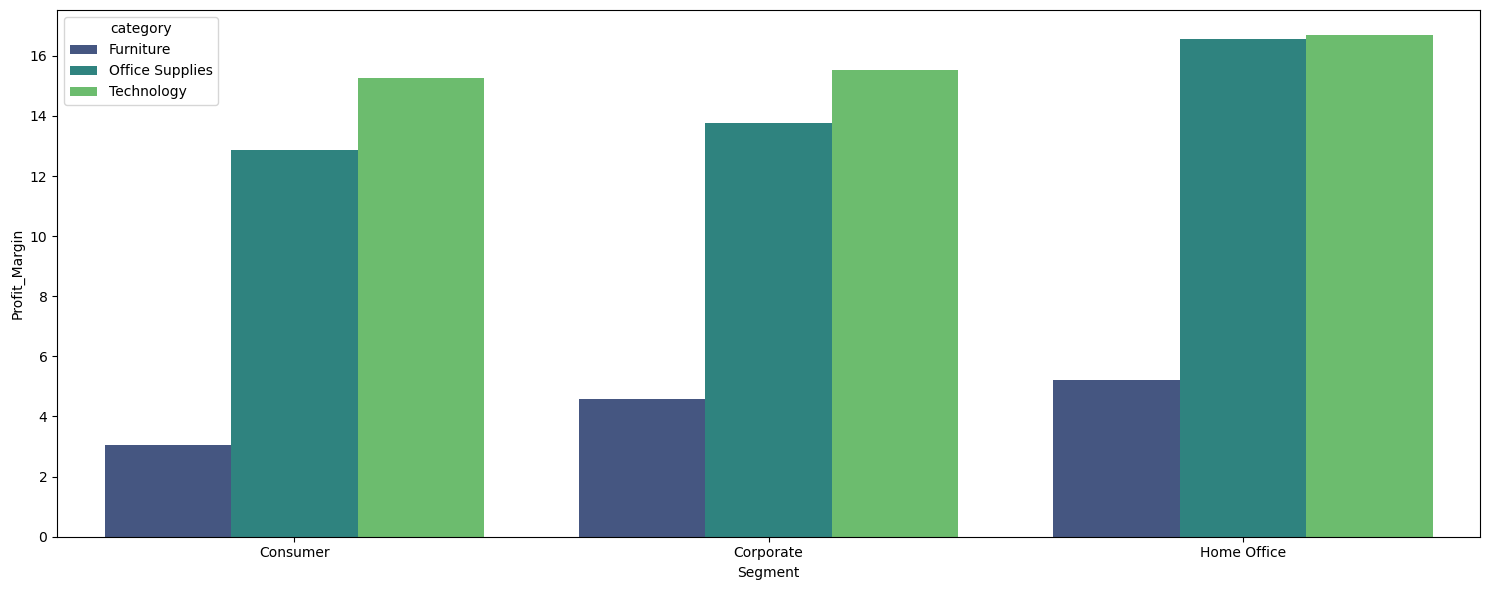

In [62]:
segment_perf = (
    sales_data.groupby(["segment", "category"])["profit_margin"]
    .mean()
    .reset_index()
    .sort_values(by = "category")
)

plt.figure(figsize = (15, 6))
sns.barplot(
    x = "segment", 
    y = "profit_margin",
    data = segment_perf,
    hue = "category",
    palette = "viridis"
)

plt.xlabel("Segment")
plt.ylabel("Profit_Margin")
plt.tight_layout()
plt.show()

---

- **Technology** consistently yields the highest profit margin across all segments.
- **Furniture** has the lowest profit margin in all segments.
- The **Home Office** segment demonstrates the highest overall profit margins.
- The **Corporate** segment tends to outperform the **Consumer** segment slightly in most categories.

---

### 5. TIME SERIES ANALYSIS

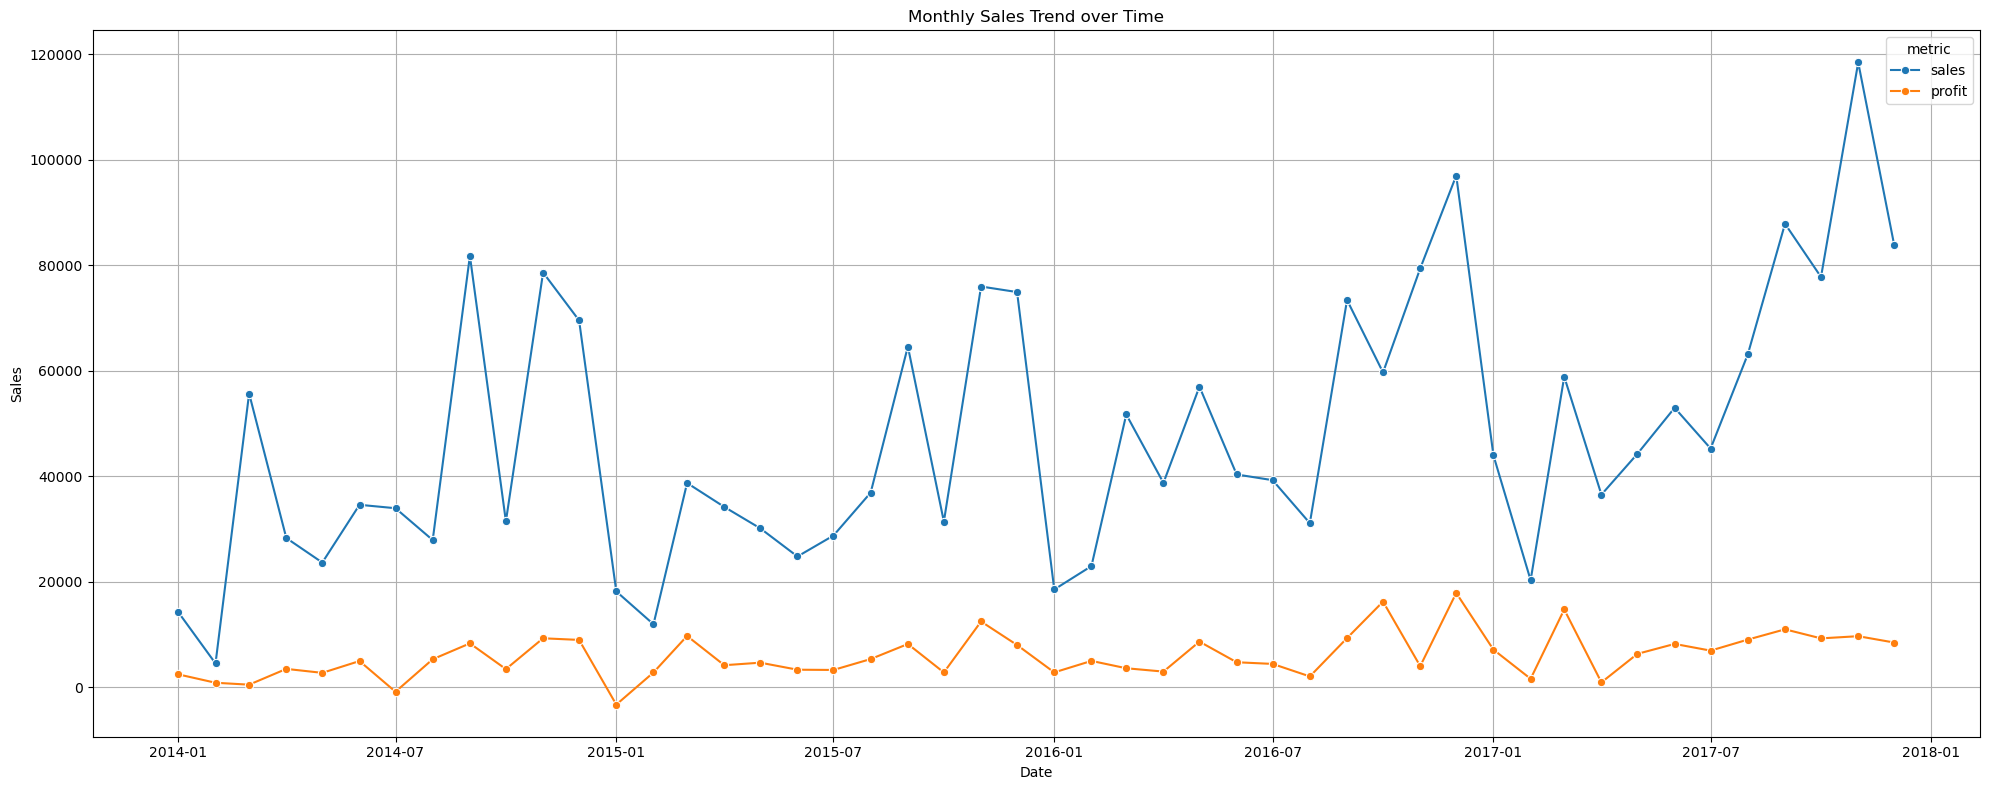

In [27]:
monthly_sales = (
    sales_data.groupby("order_month")[["sales", "profit"]]
    .sum()
    .reset_index()
    .melt(id_vars = "order_month", value_vars = ["sales", "profit"], value_name = "amount", var_name = "metric")
)

plt.figure(figsize = (20, 8))
sns.lineplot(
    x = "order_month",
    y = "amount",
    hue = "metric",
    data = monthly_sales,
    marker = 'o'
)

plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.title("Monthly Sales Trend over Time")

plt.tight_layout()
plt.show()

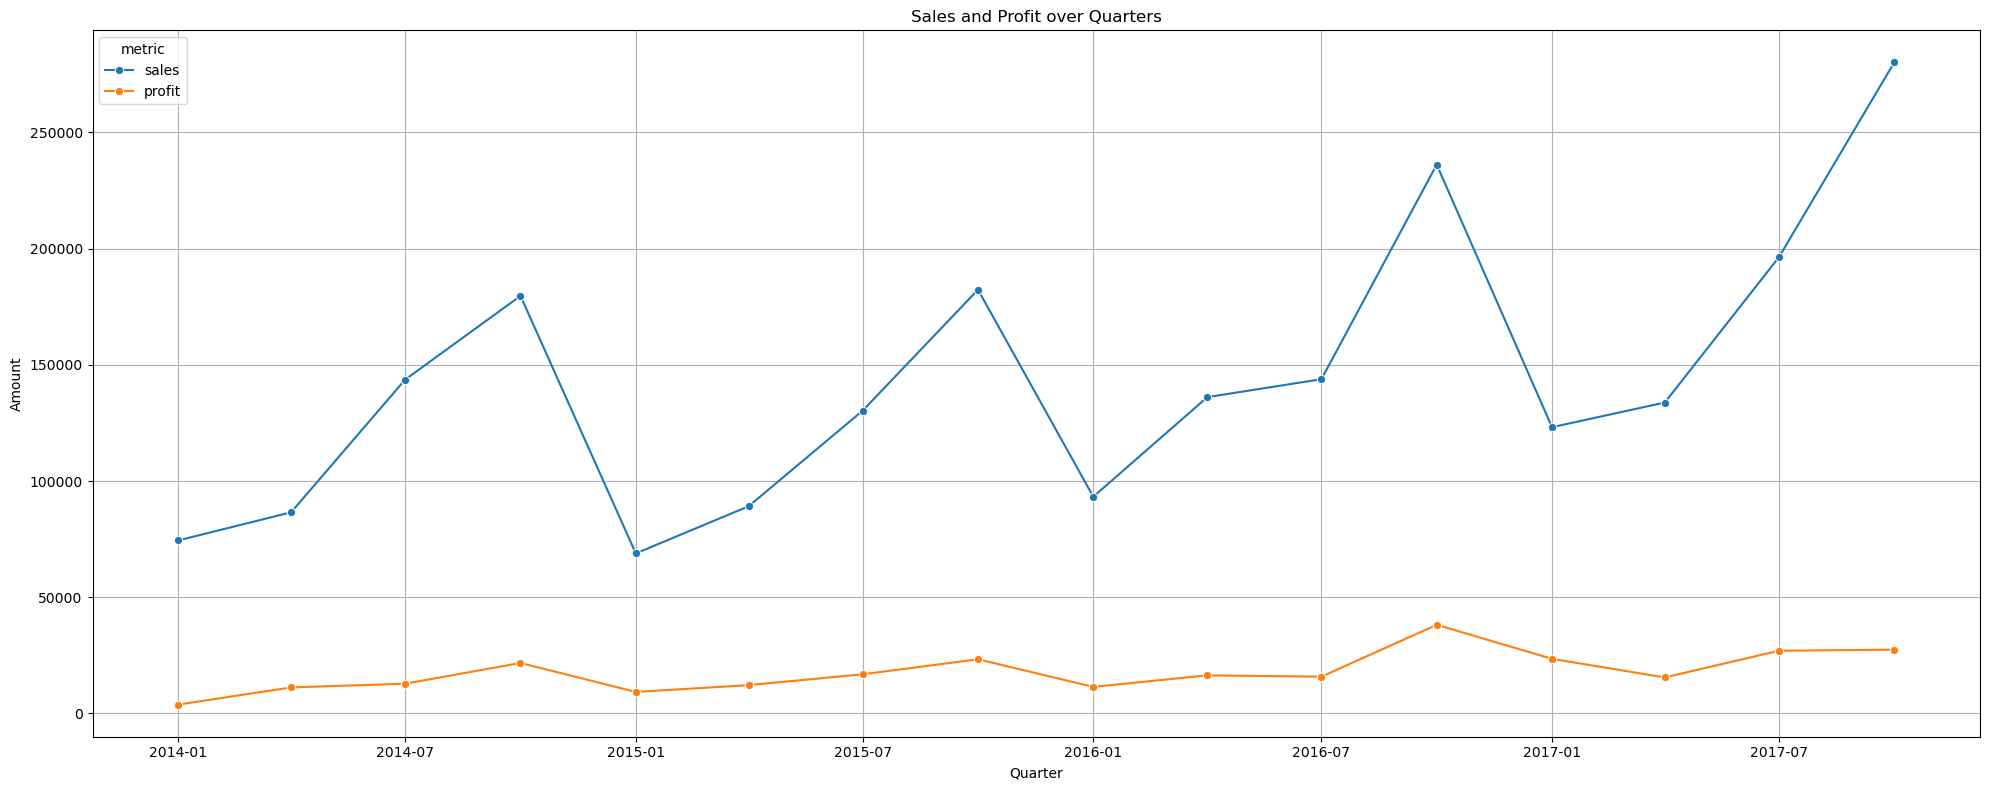

In [39]:
quarter_data = (
    sales_data.groupby("order_quarter")[["sales", "profit"]]
    .sum()
    .reset_index()
    .melt(id_vars = "order_quarter", value_vars = ["sales", "profit"], value_name = "amount", var_name = "metric")
    
)

plt.figure(figsize = (20, 8))
sns.lineplot(
    x = "order_quarter", 
    y = "amount", 
    hue = "metric",
    data = quarter_data,
    marker = "o"
)

plt.grid(True)
plt.ylabel("Amount")
plt.xlabel("Quarter")
plt.title("Sales and Profit over Quarters")

plt.tight_layout()
plt.show()



---

+ Sales exhibit a clear seasonality: There is a noticeable drop in sales in the 4th quarter of each year, consistently followed by a significant spike in the first quarter of the following year
+ The third quarter of each year generally records higher sales compared to the rest of the year, indicating possible seasonal demand or promotional cycles
+ From 2017 to early 2018, sales reached their highest levels in the observed period. However, profit did not show a corresponding increase, suggesting that the sales growth was likely driven by low-margin products or heavy discounting

---

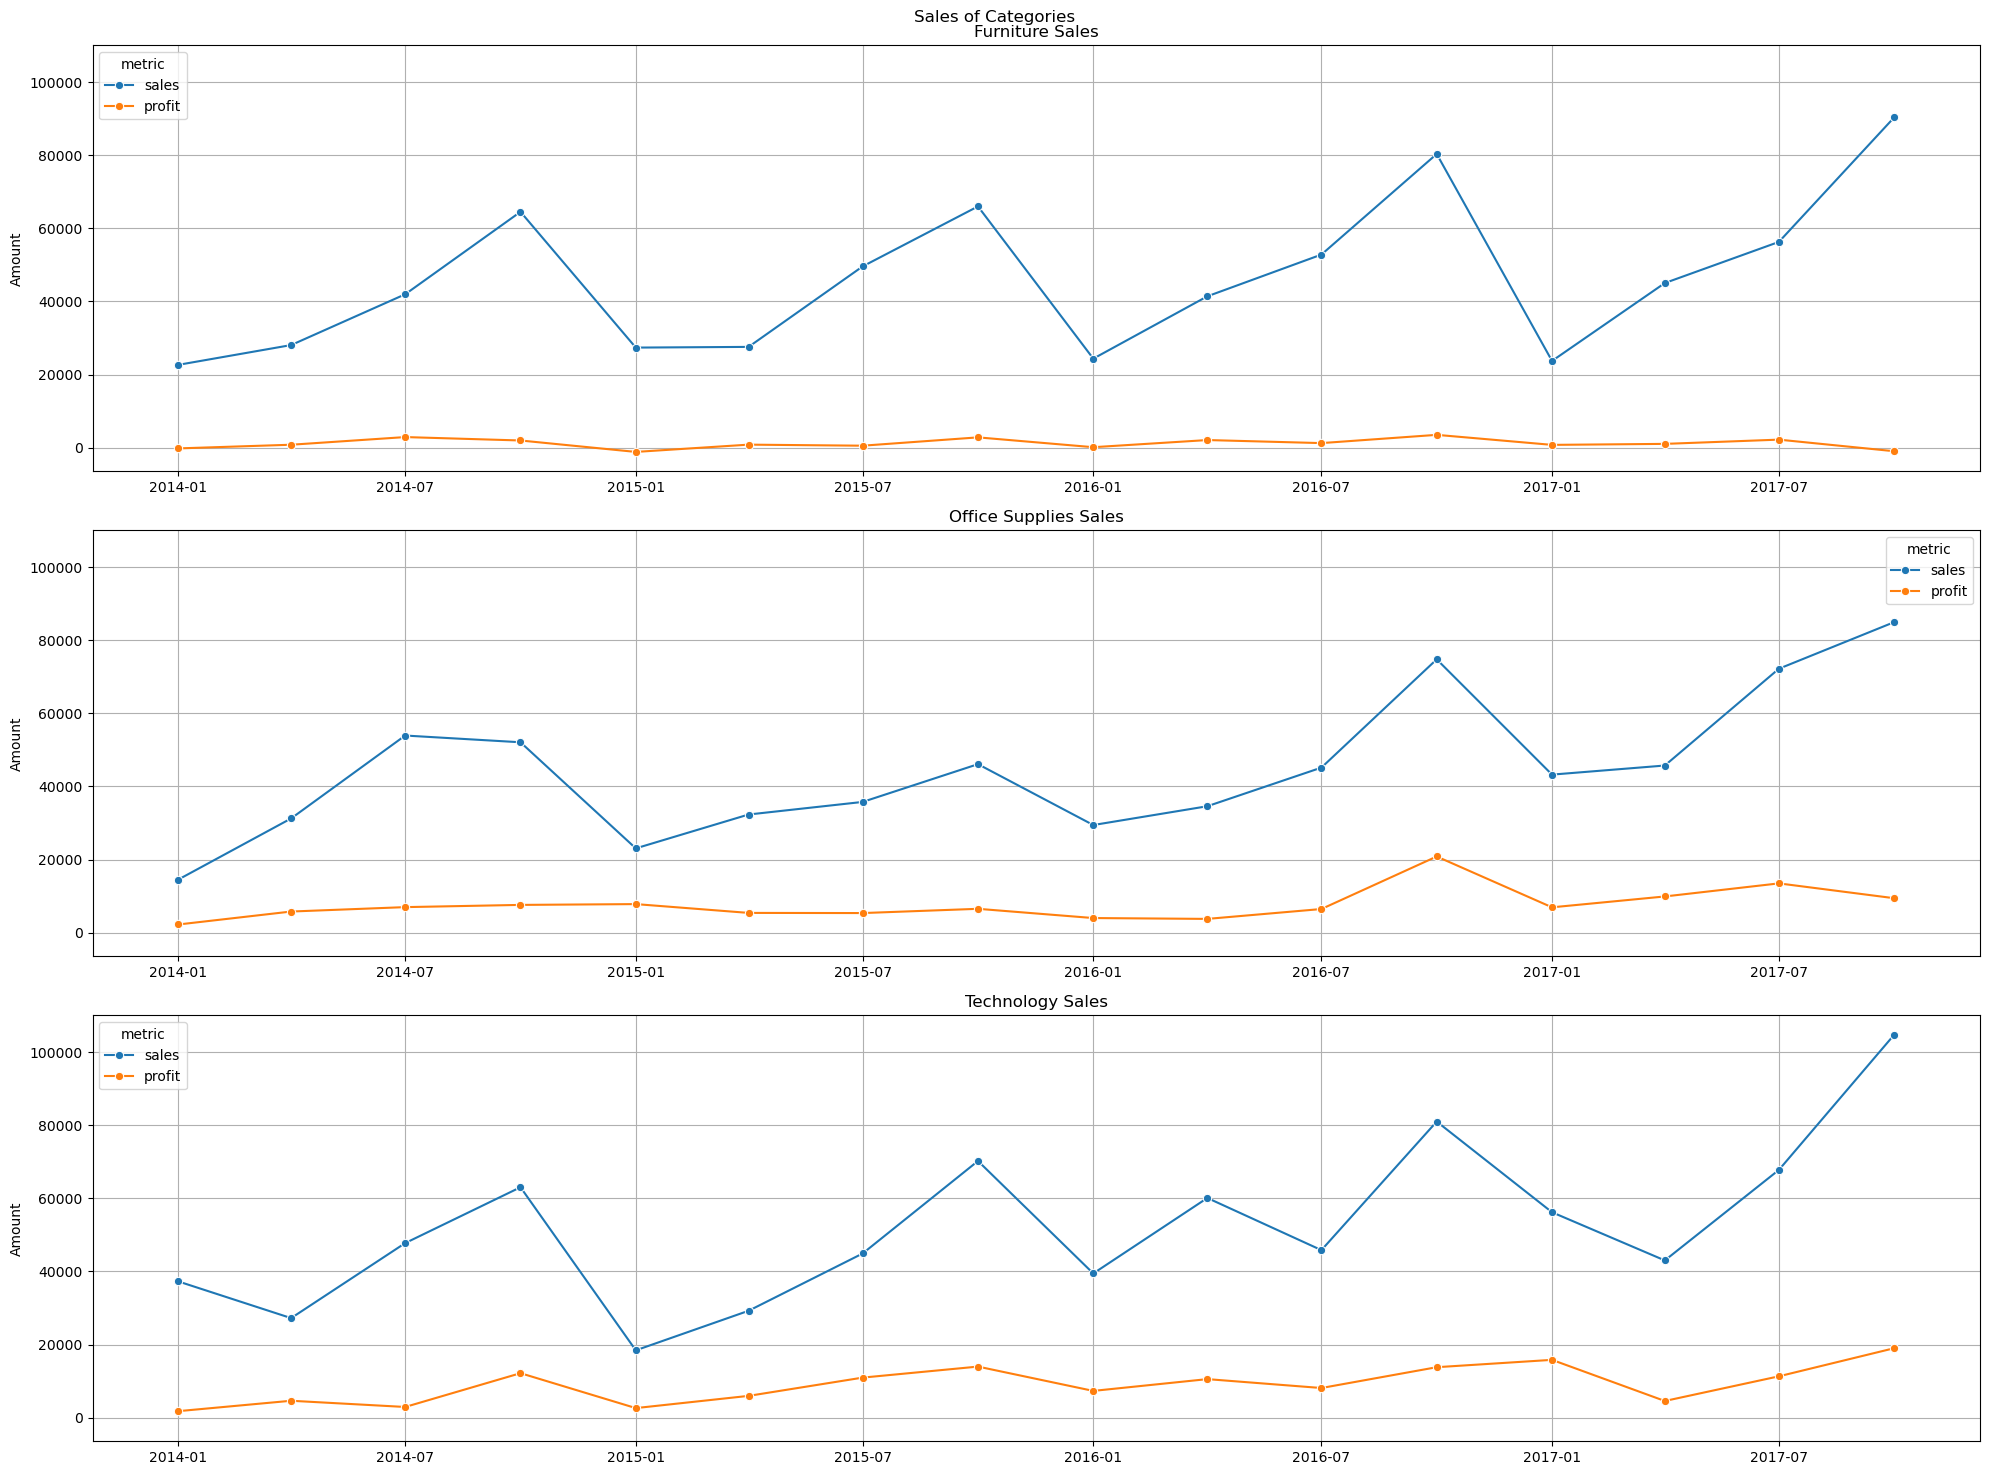

In [40]:
cat_time = (
    sales_data.groupby(["order_quarter", "category"])[["sales", "profit"]]
    .sum()
    .reset_index()
    .melt(id_vars = ["order_quarter", "category"], value_vars = ["sales", "profit"], var_name = "metric", value_name = "amount")
)


categories = sales_data["category"].unique()
fig, axes = plt.subplots(nrows = len(categories), ncols = 1, sharey = True, figsize = (20, 15))

for i, cat in enumerate(categories) :
    filter = cat_time["category"] == cat
    sub_df = cat_time[filter]

    sns.lineplot(
        x = "order_quarter",
        y = "amount",
        hue = "metric",
        data = sub_df,
        marker = "o",
        ax = axes[i],
    )
    axes[i].set_title(f"{cat} Sales")
    axes[i].set_ylabel("Amount")
    axes[i].set_xlabel("")

for ax in axes :
    ax.grid(True)

fig.suptitle("Sales of Categories")
plt.tight_layout()
plt.show()

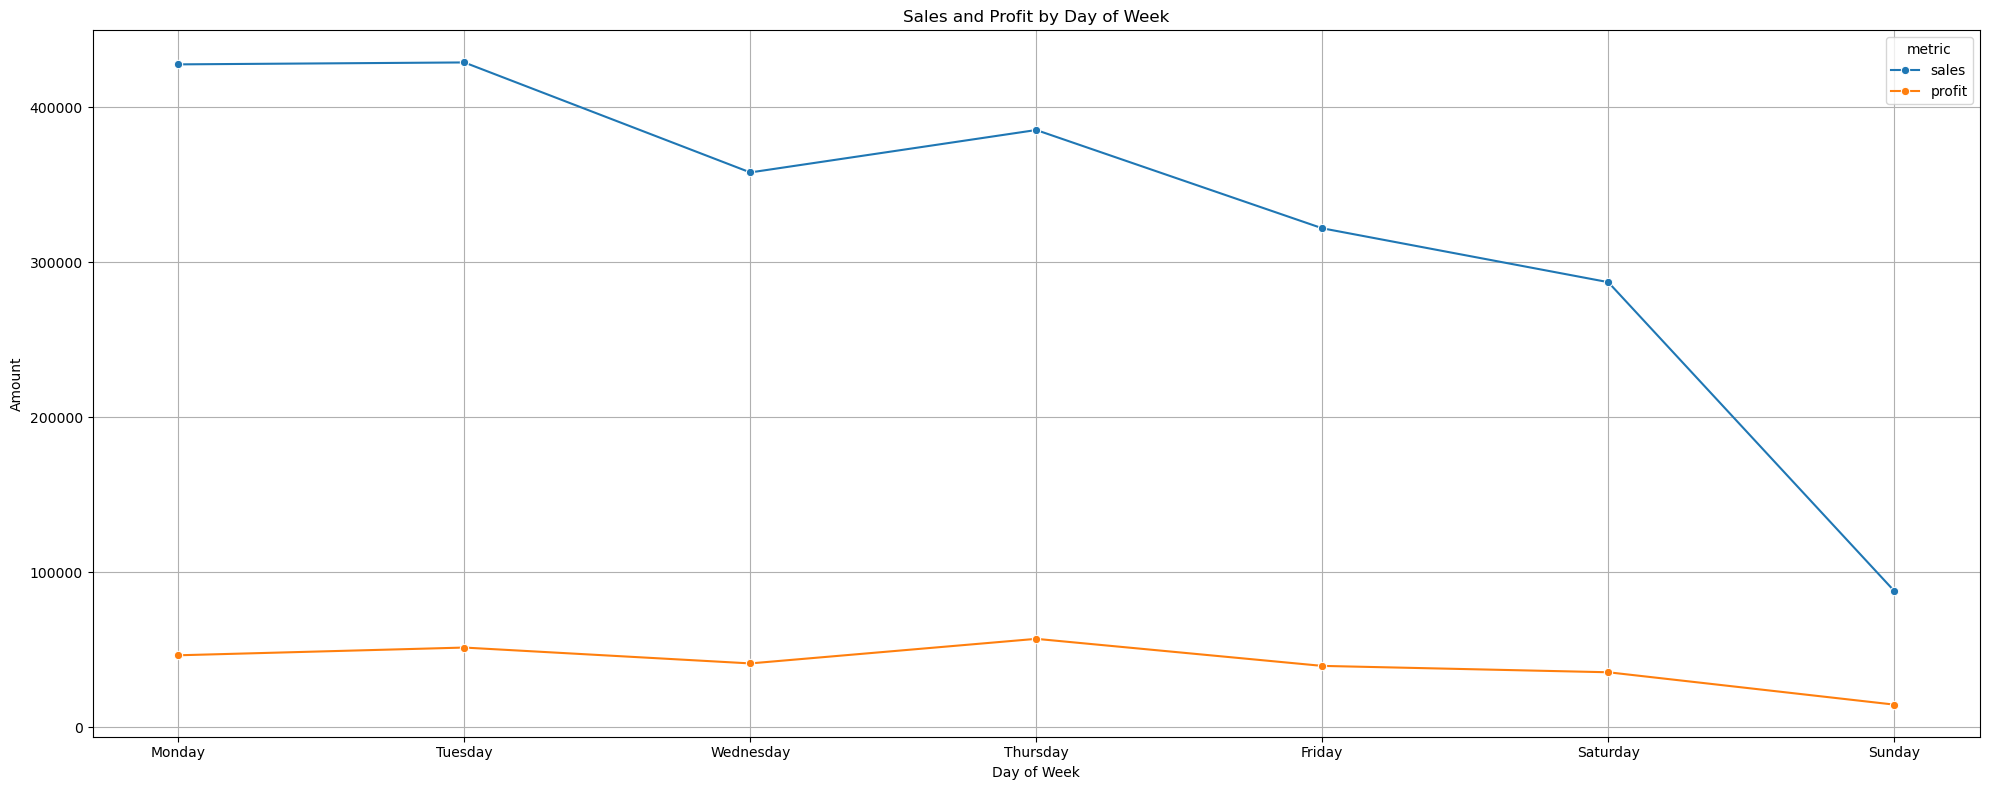

In [42]:
day_analysis = (
    sales_data.groupby("order_dow")[["sales", "profit"]]
    .sum()
    .reset_index()
    .melt(id_vars="order_dow", value_vars=["sales", "profit"], value_name="amount", var_name="metric")
)

plt.figure(figsize=(20, 8))
sns.lineplot(
    x="order_dow",
    y="amount",
    data=day_analysis,
    hue="metric",
    marker = "o"
)

# Manually set x-ticks to ensure correct order
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.xticks(ticks=range(7), labels=order)

plt.grid(True)
plt.title("Sales and Profit by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Amount")

plt.tight_layout()
plt.show()


---

- **Monday and Tuesday** show the **highest sales volumes**, peaking above 400,000.
- Sales **gradually decline through the week**, with the **lowest sales on Sunday**.
- **Profit trends are much flatter** but follow a similar pattern:
  - Slight peak on **Thursday**
  - Steady decline toward **Sunday**, which has the lowest profit.
- **Sunday has both the lowest sales and profit**, indicating low customer activity or conversions.

---

6. #### Ship Mode Analysis : 

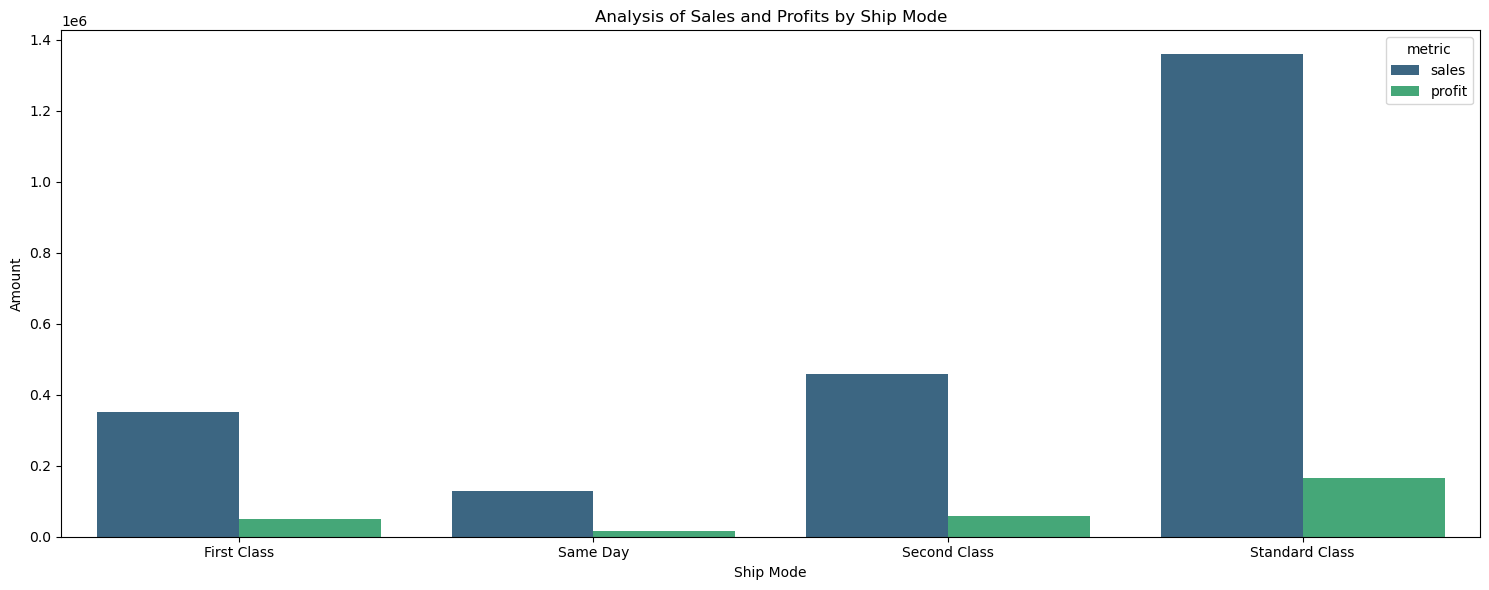

In [43]:
ship_data = (
    sales_data.groupby("ship_mode")[["sales", "profit"]]
    .sum()
    .reset_index()
    .melt(id_vars = "ship_mode", value_vars = ["sales", "profit"], var_name = "metric", value_name = "amount")
)

plt.figure(figsize = (15, 6))
sns.barplot(
    x = "ship_mode", 
    y = "amount", 
    hue = "metric", 
    data = ship_data,
    palette = "viridis"
)

plt.title("Analysis of Sales and Profits by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()